 # Linear Regression
 
 Linear Regression is an algorithm where we predict a value for a defined set of parameters, for example it could be predicting the price of a house considering number of rooms, area etc.
 
 Below is the simple plot of graph between X and y

X: [1 2 3 4]
y: [11 22 33 44]


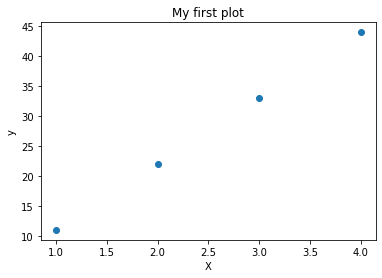

In [18]:
import numpy as np
import matplotlib.pyplot as plt

X = np.array([1,2,3,4])
y = np.array([11,22,33,44])

print('X:', X)
print('y:', y)

plt.scatter(X,y)
plt.xlabel("X")
plt.ylabel("y")
plt.title("My first plot")
plt.show()

## Predict Function 
Defined Predict function which predicts the value for the given set of parameters X with defined slope and intercept

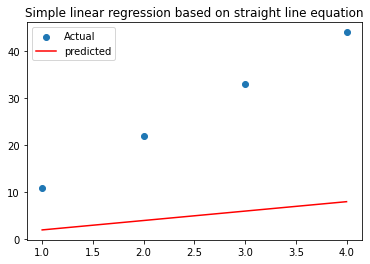

In [19]:
def predict(X,slope,intercept):
    return slope * X + intercept

slope = 2
intercept = 0

predictions = predict(X, slope, intercept)
actual = y

plt.scatter(X,actual, label='Actual')
plt.plot(X, predictions, color='red', label='predicted')
plt.legend()
plt.title("Simple linear regression based on straight line equation")
plt.show()

## Cost Function
It defines how well the model is actually working
lower the cost function, better is the model

In [20]:
def costFunction(predictions, actual, m):
     return (1/(2*m)) * np.sum((actual - predictions)**2)
    
costFunction(predictions5, y, len(y))

203.75

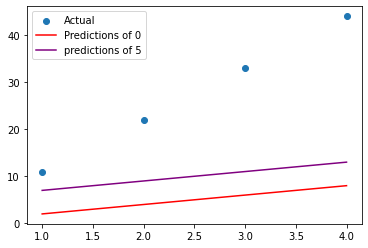

203.75

In [21]:
slope = 2
intercept = 0
predictions0 = predict(X, slope, intercept)

intercept = 5
predictions5 = predict(X, slope, intercept)

plt.scatter(X, y, label='Actual')
plt.plot(X,predictions0, color='red',label='Predictions of 0')
plt.plot(X, predictions5, color='purple',label='predictions of 5')
plt.legend()
plt.show()

def costFunction(predictions, actual, m):
     return (1/(2*m)) * np.sum((actual - predictions)**2)
    
costFunction(predictions5, y, len(y))

**U-curve for 100 different slope values ranging between 0 and 20 and printing the corresponding cost values**

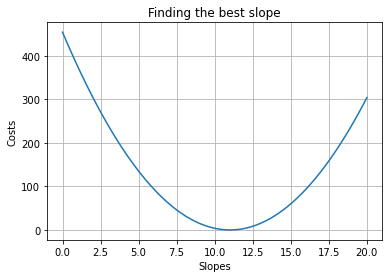

The minimum cost is 0.03099173553719051
The best slope is 10.909090909090908


In [22]:
slopes = np.linspace(0, 20, 100)
costs = []
for slope in slopes:
    prediction = slope * X + 0
    cost = costFunction(prediction, y, len(X))
    costs.append(cost)
    
plt.plot(slopes, costs)
plt.xlabel("Slopes")
plt.ylabel("Costs")
plt.title("Finding the best slope")
plt.grid(True)
plt.show()

bestIndex = np.argmin(costs)
print(f'The minimum cost is {costs[bestIndex]}')
print(f'The best slope is {slopes[bestIndex]}')

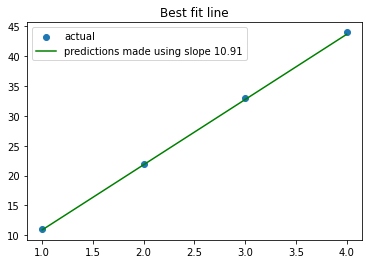

In [23]:
best_slope = 10.91
predictions = best_slope * X + 0

plt.scatter(X, y, label='actual')
plt.plot(X, predictions, label=f'predictions made using slope {best_slope}', color='green')
plt.legend()
plt.title("Best fit line")
plt.show()


We manually found the best slope for a single-parameter model, but when there are multiple parameters, it becomes extremely difficult (and impractical) to determine the best slopes manually.
This is where gradient descent helps—it automatically finds the optimal parameters by minimizing the cost function.

Understanding Gradient Direction (Example at slope = 5)

If the cost curve is going DOWN as we move right → the gradient is negative → increase the slope

If the cost curve is going UP as we move right → the gradient is positive → decrease the slope

Gradient descent applies the following update rule:

new_slope = old_slope - learning_rate * gradient

Intuition:

The gradient tells us the direction of steepest ascent of the cost function.
Gradient descent moves opposite to the gradient, pushing the parameters toward the local minimum, where the cost is the lowest.


In [24]:
history = []
slope = 0
intercept = 0
learning_rate = 0.01

for i in range(100):
    prediction = slope * X + intercept
    m = len(X)
    cost = costFunction(prediction, y, m)
    history.append({'iteration': i, 'slope': slope, 'cost': cost})
    gradient = -2/m * (np.sum(X*(y-prediction)))
    slope = slope - learning_rate * gradient
    
    if i % 10 == 0:
        print({'iteration': i, 'slope': slope, 'cost': cost})
        
        
print(f'Final Slope: {slope}')
print('Correct slope: ', 10.91)
    

{'iteration': 0, 'slope': 1.6500000000000001, 'cost': 453.75}
{'iteration': 10, 'slope': 9.159224319414243, 'cost': 17.58713722959839}
{'iteration': 20, 'slope': 10.63759838435979, 'cost': 0.6816691921382398}
{'iteration': 30, 'slope': 10.928652397788719, 'cost': 0.02642117824203696}
{'iteration': 40, 'slope': 10.985953483313514, 'cost': 0.0010240724793617864}
{'iteration': 50, 'slope': 10.997234600394286, 'cost': 3.969256909661457e-05}
{'iteration': 60, 'slope': 10.999455563599861, 'cost': 1.538465365726297e-06}
{'iteration': 70, 'slope': 10.999892814408021, 'cost': 5.96301961641606e-08}
{'iteration': 80, 'slope': 10.999978897900425, 'cost': 2.3112384417825995e-09}
{'iteration': 90, 'slope': 10.999995845536716, 'cost': 8.958251819838447e-11}
Final Slope: 10.9999990377559
Correct slope:  10.91


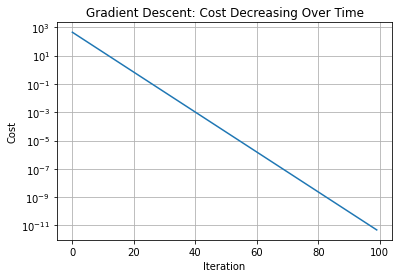

In [25]:
iterations = [h['iteration'] for h in history]
cost = [h['cost'] for h in history]
plt.plot(iterations, cost)
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.title('Gradient Descent: Cost Decreasing Over Time')
plt.yscale('log')  # Log scale because cost drops so fast
plt.grid(True)
plt.show()


The above graph shows how the gradient descent works over the iterations to obtain the correct fit slope

## What I learnt from this:

- Linear Regression algorithm is used to predict values under given parameters.
- This is a supervised algorithm, where it learns to predict the values by learning from actual given values.
- We define a predict function to predict the value for the given parameters.
- Then, to judge the deviation of the prediction from the actual one, we calculate the cost function.  
  Lesser the cost function, the better the model is.
- Suppose the cost is high — how do we reduce it?
    - By modifying the slope and intercept values that are used for prediction.
    - To do the same, we first manually generated 100 evenly spaced slope values ranging between 0 and 20, and then calculated the cost value for each slope and plotted the same.
    - The plot clearly defines the best slope, which has the least cost close to 0, which is 10.91.
    - This was done manually. It becomes tedious when multiple parameters are used.
    - Therefore, there exists an algorithm called "Gradient Descent" which helps us find the optimum slope for the defined function.
- So, how does the Gradient Descent algorithm work?
    - It helps us find the correct direction the slope should move in order to reach the global minima.
    - To obtain the direction, we found the partial derivative of the cost function with respect to slope *m*.
    - After obtaining the gradient, it was multiplied by the learning rate to determine how big of a step it should take in that particular direction.
    - The final slope value is obtained by subtracting the previous slope value by the current gradient multiplied by the learning rate.
    - Here, we performed 100 iterations considering the initial slope value to be 0 and kept the intercept constant, which is again 0.
    - At the end, we obtained the slope value of 10.99, which is close to the one found manually, which was 10.91.
    - The plot clearly shows the decline in the costs over the iterations.
